# 连续分布
## continuous probability distribution

In [1]:
from data_utils.stochastic_utils.distributions.basic_distributions import *
from data_utils.stochastic_utils.distributions.estimation import *
from data_utils.stochastic_utils.distributions.nonParametricDistribution import *
import numpy
from matplotlib import pyplot

# 初始化威布尔分布(形状参数, 尺度参数)
## Initialize Weibull distribution (shape parameters, scale parameters)

In [2]:
w = WeibullDistribution(2,5)

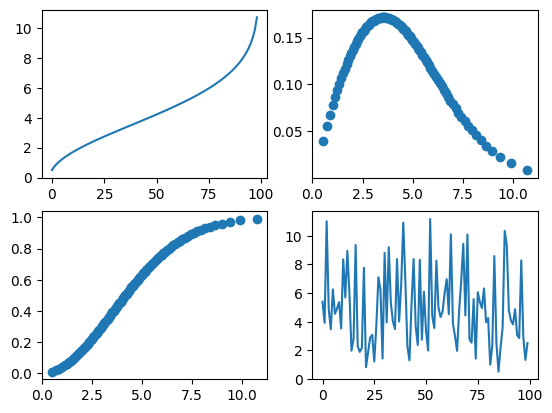

In [3]:
# 绘制ppf, pdf, cdf
fig, axs = pyplot.subplots(2,2)
axs[0][0].plot(w.ppf().y)
axs[0][1].scatter(x = w.pdf().x, y = w.pdf().y)
axs[1][0].scatter(x = w.cdf().x, y = w.cdf().y)
axs[1][1].plot(w.rvf(100))
pyplot.show()

# 使用随机变量进行参数拟合
## Using random variables for parameter fitting

data_estimate took 0.6771647930145264 seconds to execute
0.005259080421585022


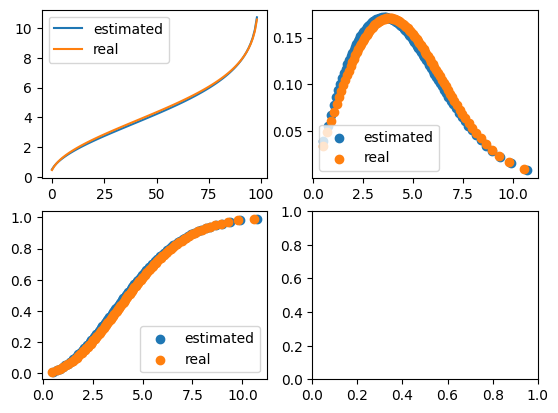

In [4]:
es = SangDistEstimated(w.rvf(1000), loss=0.01)
esd, loss, _ = es.data_estimate(WeibullDistribution, epoch=1000, max_try=20, timer=True)
print(loss)
fig, axs = pyplot.subplots(2,2)
axs[0,0].plot(w.ppf().y)
axs[0,0].plot(esd.ppf().y)
axs[0,0].legend(["estimated", "real"])
axs[0,1].scatter(x = w.pdf().x, y = w.pdf().y)
axs[0,1].scatter(x = esd.pdf().x, y =esd.pdf().y)
axs[0,1].legend(["estimated", "real"])
axs[1,0].scatter(x = w.cdf().x, y = w.cdf().y)
axs[1,0].scatter(x = esd.cdf().x, y =esd.cdf().y)
axs[1,0].legend(["estimated", "real"])
pyplot.show()

# 对随机变量使用非参分布拟合
## Fit random variables using non parametric distributions

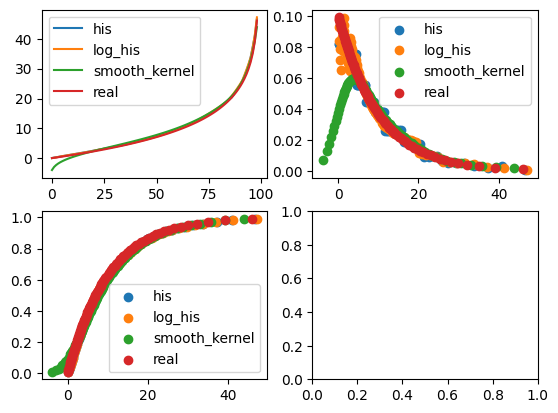

In [5]:
dist = WeibullDistribution(1, 10)
r = dist.rvf(1000)
his_dist = HistogramDist(r)
log_his_dist = LogHisDist(r)
smooth_his_dist = SmoothHisDist(r)
fig, axs = pyplot.subplots(2,2)
axs[0,0].plot(his_dist.ppf().y)
axs[0,0].plot(log_his_dist.ppf().y)
axs[0,0].plot(smooth_his_dist.ppf().y)
axs[0,0].plot(dist.ppf().y)
axs[0,0].legend(["his", "log_his", "smooth_kernel", "real"])
axs[0,1].scatter(x = his_dist.pdf().x, y =his_dist.pdf().y)
axs[0,1].scatter(x = log_his_dist.pdf().x, y =log_his_dist.pdf().y)
axs[0,1].scatter(x = smooth_his_dist.pdf().x, y =smooth_his_dist.pdf().y)
axs[0,1].scatter(x = dist.pdf().x, y = dist.pdf().y)
axs[0,1].legend(["his", "log_his", "smooth_kernel",  "real"])
axs[1,0].scatter(x = his_dist.cdf().x, y =his_dist.cdf().y)
axs[1,0].scatter(x = log_his_dist.cdf().x, y =log_his_dist.cdf().y)
axs[1,0].scatter(x = smooth_his_dist.cdf().x, y =smooth_his_dist.cdf().y)
axs[1,0].scatter(x = dist.cdf().x, y = dist.cdf().y)
axs[1,0].legend(["his", "log_his", "smooth_kernel",  "real"])
pyplot.show()

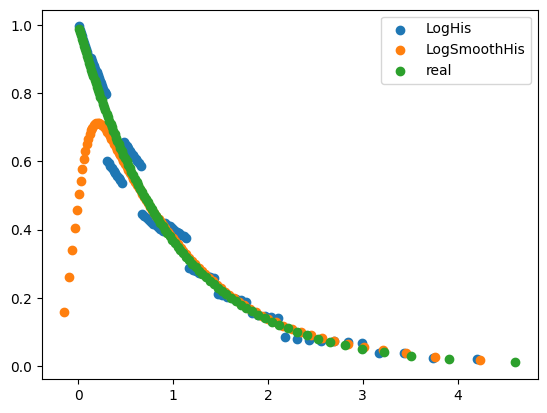

In [6]:
dist = WeibullDistribution(1,1)
r = dist.rvf(1000)
log_his_dist = LogHisDist(r)
log_smooth_his_dist = LogSmoothHisDist(r)
pyplot.scatter(x=log_his_dist.pdf().x, y=log_his_dist.pdf().y)
pyplot.scatter(x=log_smooth_his_dist.pdf().x, y=log_smooth_his_dist.pdf().y)
pyplot.scatter(x=dist.pdf().x, y=dist.pdf().y)
pyplot.legend(["LogHis", "LogSmoothHis", "real"])
pyplot.show()

# 给定分布的均值和标准层, 拟合分布参数
## Given the mean and standard layer of the distribution, fit the distribution parameters

moment_ed took 0.5632588863372803 seconds to execute
{'name': "<class 'data_utils.stochastic_utils.distributions.basic_distributions.LogNormalDistribution'>", 'args': '()', 'kwargs': "{'mu': -8.486724135254443, 'sigma': 2.9063888089714074}"}
[0.014077518582849679, 0.9610436024362906]


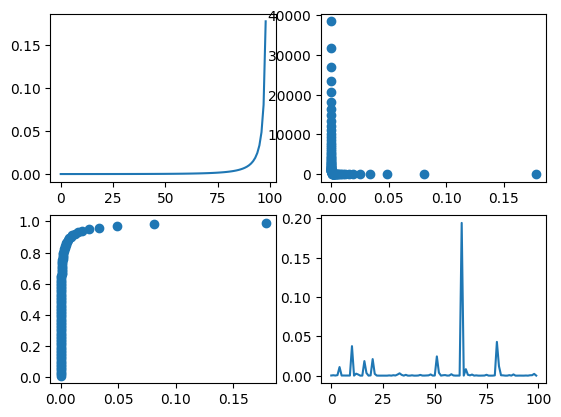

In [9]:
lnd, moments = moment_ed({"mean":0, "std":1}, LogNormalDistribution, timer=True, epoch=5000)
print(lnd)
print(moments)
fig, axs = pyplot.subplots(2,2)
axs[0][0].plot(lnd.ppf().y)
axs[0][1].scatter(x = lnd.pdf().x, y = lnd.pdf().y)
axs[1][0].scatter(x = lnd.cdf().x, y = lnd.cdf().y)
axs[1][1].plot(lnd.rvf(100))
pyplot.show()